# Plant Disease Recognition with TensorFlow Lite Model Maker with TensorFlow 2.0

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to recognize plant diseases on a mobile device.

## Prerequisites

To run this example, we first need to make a copy of this notebook. Click on "Copy to Drive" at the top of this notebook. Then we need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install -q tflite-model-maker
!sudo apt-get install libportaudio2
!pip install sounddevice

     |████████████████████████████████| 642 kB 8.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.3 MB/s 
     |████████████████████████████████| 3.4 MB 55.9 MB/s 
     |████████████████████████████████| 1.2 MB 52.7 MB/s 
     |████████████████████████████████| 10.9 MB 50.8 MB/s 
     |████████████████████████████████| 237 kB 72.6 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 6.4 MB 46.4 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 120 kB 63.0 MB/s 
     |████████████████████████████████| 840 kB 49.4 MB/s 
     |████████████████████████████████| 25.3 MB 81.6 MB/s 
     |████████████████████████████████| 99 kB 10.3 MB/s 
     |████████████████████████████████| 352 kB 70.0 MB/s 
     |████████████████████████████████| 90.3 MB 123 kB/s 
  Installing build

Import the required packages.

In [ ]:
from tflite_model_maker import image_classifier
from tflite_model_maker import model_spec
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')

import matplotlib.pyplot as plt
import numpy as np

import pathlib

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Documents/Colab/plant_disease/dataset.zip" -d "/content/dataset"

unzip:  cannot find or open /content/drive/MyDrive/Documents/Colab/plant_disease/dataset.zip, /content/drive/MyDrive/Documents/Colab/plant_disease/dataset.zip.zip or /content/drive/MyDrive/Documents/Colab/plant_disease/dataset.zip.ZIP.


In [ ]:
train_image_path = pathlib.Path('/content/drive/Shareddrives/C22-PS279/ML/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train') 
test_image_path = pathlib.Path('/content/drive/Shareddrives/C22-PS279/ML/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [ ]:
train_data = DataLoader.from_folder(train_image_path)
test_data = DataLoader.from_folder(test_image_path)

INFO:tensorflow:Load image with size: 70295, num_label: 38, labels: Apple___Apple_scab, Apple___Black_rot, Apple___Cedar_apple_rust, Apple___healthy, Blueberry___healthy, Cherry_(including_sour)___Powdery_mildew, Cherry_(including_sour)___healthy, Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, Corn_(maize)___Common_rust_, Corn_(maize)___Northern_Leaf_Blight, Corn_(maize)___healthy, Grape___Black_rot, Grape___Esca_(Black_Measles), Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Grape___healthy, Orange___Haunglongbing_(Citrus_greening), Peach___Bacterial_spot, Peach___healthy, Pepper,_bell___Bacterial_spot, Pepper,_bell___healthy, Potato___Early_blight, Potato___Late_blight, Potato___healthy, Raspberry___healthy, Soybean___healthy, Squash___Powdery_mildew, Strawberry___Leaf_scorch, Strawberry___healthy, Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot

2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data, epochs=10)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 3,461,702
Trainable params: 48,678
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2196/2196 [==============================] - 10469s 5s/step - loss: 1.2200 - accuracy: 0.8721
Epoch 2/10
2196/2196 [==============================] - 253s 115ms/step - loss: 1.0166 - accuracy: 0.9375
Epoch 3/10
2196/2196 [==============================] - 249s 113ms/step - loss: 0.9873 - accuracy: 0.9457
Epoch 4/10
2196/2196 [==============================] - 252s 115ms/step - loss: 0.9710 - accuracy: 0.9514
Epoch 5/10
2196/2196 [==============================] - 252s 115ms/step - loss: 0.9603 - accuracy: 0.9558
Epoch 6/10
2196/2196 [==============================] - 251s 114ms/step - loss: 0.9538 - accuracy: 0.9570
Epoch 7/10
2196/2196 [==============================] - 251s 114ms/step - loss: 0.9474 - accuracy: 0.9599
Epoch 8/10
2196/2196 [==============================] - 253s 115ms/step - loss: 0.9441 - accuracy: 0.9607
Epoch 9/10
2196/2196 [==============================] - 250s 114ms/step - loss: 0.9408 - accuracy: 0.9617
Epoch 10/10
2196/2196 [==============================] - 2

3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

550/550 [==============================] - 2848s 5s/step - loss: 0.9042 - accuracy: 0.9683


4.  Export to TensorFlow Lite model.
You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpcxxdg_7j/assets


INFO:tensorflow:Assets written to: /tmp/tmpcxxdg_7j/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpc5y5hsj0/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpc5y5hsj0/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


5. Download the trained model by clicking on the folder icon on the left hand side. Right-click on "model.tflite" and select download. Or run the following code:

In [ ]:
from google.colab import files
files.download('model.tflite') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

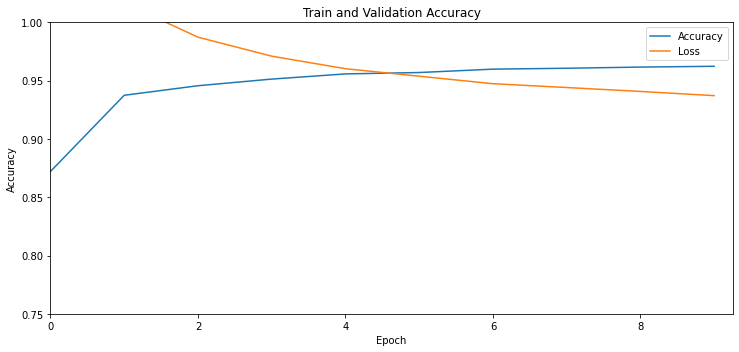

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(model.history.history['accuracy'], label="Accuracy")
plt.plot(model.history.history['loss'], label="Loss")

plt.xlim(0, 9.25)
plt.ylim(0.75, 1.0)

plt.legend()
plt.tight_layout()

After this simple 5 steps, we can now continue to the next step in the [codelab](https://codelabs.developers.google.com/codelabs/recognize-flowers-with-tensorflow-on-android-beta/#2).

For a more comprehensive guide to TFLite Model Maker, please refer to this [notebook](https://colab.sandbox.google.com/github/tensorflow/examples/blob/master/tensorflow_examples/lite/model_maker/demo/image_classification.ipynb) and its [documentation](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).